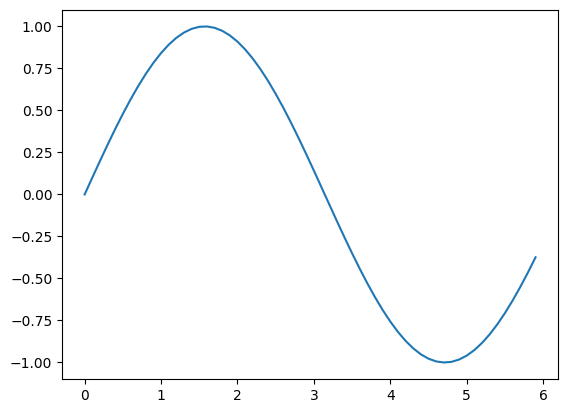

In [2]:
import numpy as np
from matplotlib import pyplot as plt
x=np.arange(0,6,0.1)
y=np.sin(x)
plt.plot(x,y)
plt.show()

In [5]:
X=np.array([-1,2,3])
y=X>0
print(y.astype(int))

[0 1 1]


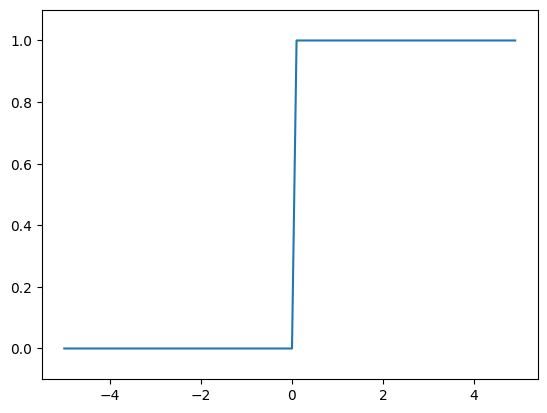

In [ ]:
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y=step_function(x)

# print(y)
plt.plot(x,y)
# 规定y坐标轴范围
plt.ylim(-0.1, 1.1)
plt.show()

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3
 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9
 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


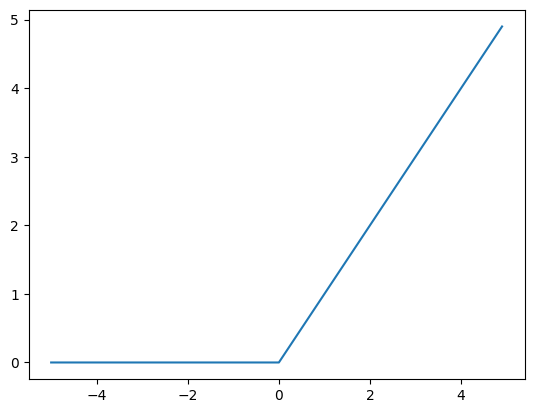

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ReLU(x):
    return np.maximum(0, x)
x=np.arange(-5.0, 5.0, 0.1)
# print(ReLU(x))
plt.plot(x,ReLU(x))
plt.show()

In [28]:
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [30]:
# 3层神经网络的实现
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network
def identity_function(x):
    return x
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y
network=init_network()
x=np.array([1.0, 0.5])
y=forward(network, x)
print(y)

[0.31682708 0.69627909]


In [39]:
# 神经网络可以用于回归任务和分类任务，回归问题用恒等函数，分类问题用softmax函数。
def softmax(x):
    """
    计算softmax函数
    """
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# 回归问题
def regression(x):
    """
    回归问题
    """
    return x
print(softmax(np.array([1010, 2000, 3000])))
def softmax(x):
    """
    计算softmax函数，解决溢出问题
    """
    x = x - np.max(x)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)
print(softmax(np.array([1010, 1000, 990])))


[nan nan nan]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/tmp/ipykernel_4372/1727050240.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x), axis=0)
/tmp/ipykernel_4372/1727050240.py:6: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=0)


In [43]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# 数据预处理：归一化
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.1307,), (0.3081,))
])

# 加载训练集和测试集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
# 加载训练集和测试集的DataLoader,每次加载64个样本,train_loader的shuffle参数设为True表示每次迭代时都打乱数据
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.80MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 183kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.78MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.90MB/s]


In [119]:
train_size=train_dataset.data.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size,batch_size)
print("train_size:",batch_mask)

train_size: [ 3068 11116 21010 58928 52110 53835  2518 35888 11323 57289]


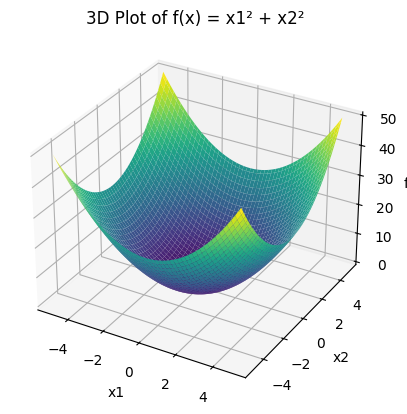

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function_2(x):
    return x[0]**2 + x[1]**2

# 创建网格数据
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = function_2([X1, X2])

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
ax.plot_surface(X1, X2, Z, cmap='viridis')

# 添加标签
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
plt.title('3D Plot of f(x) = x1² + x2²')

plt.show()

torch.Size([60000, 28, 28])


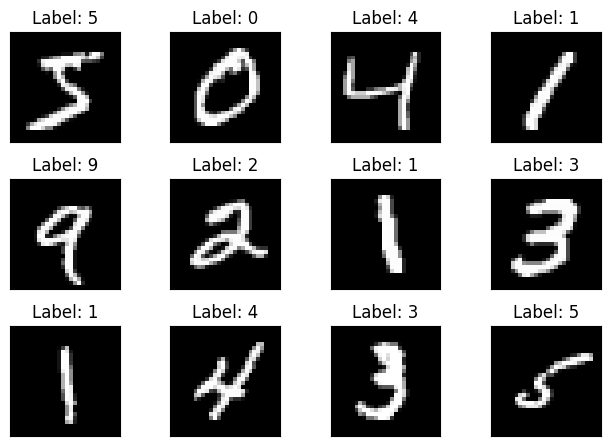

In [65]:
# 查看shape和图片
from matplotlib import pyplot as plt
print(train_dataset.train_data.shape)
fig=plt.figure()
for i in range(12):
    # 创建一个 3×4 的网格，共 12 个子图
    plt.subplot(3,4,i+1)
    # 自动调整子图之间的间距和边距
    plt.tight_layout()
    # 显示图片 ，'gray' 表示灰度图
    plt.imshow(train_dataset.train_data[i], cmap='gray')
    # 不显示x,y刻度
    plt.xticks([])
    plt.yticks([])
    # 设置标题
    plt.title(f'Label: {train_dataset.train_labels[i]}')
# 显示图片
plt.show()

In [66]:
import torch.nn as nn
import torch.nn.functional as F
# 定义CNN模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) # 展平
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()

In [ ]:
import torch.optim as optim
# 交叉熵损失函数用于分类问题
criterion = nn.CrossEntropyLoss()
# Adam优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [76]:
from tqdm import tqdm  # 用于显示进度条

def train_model(model, train_loader, optimizer, criterion, epochs=10):
    """
    训练模型函数
    参数:
        model: 神经网络模型
        train_loader: 训练数据 DataLoader
        optimizer: 优化器 (如 Adam, SGD)
        criterion: 损失函数 (如 CrossEntropyLoss)
        epochs: 训练轮数
    """
    model.train()  # 设置为训练模式（启用 dropout、BN 等）
    
    for epoch in range(epochs):  # 外层循环：共训练 epochs 轮
        running_loss = 0.0  # 记录一个 epoch 内的累计 loss

        # tqdm 用于显示进度条，每个 batch 迭代时会实时刷新
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

        for images, labels in progress_bar:
            # 梯度清零（防止梯度累积）
            optimizer.zero_grad()
            
            # 前向传播
            outputs = model(images)
            
            # 计算损失
            loss = criterion(outputs, labels)
            
            # 反向传播
            loss.backward()
            
            # 参数更新
            optimizer.step()
            
            # 累加损失，用于 epoch 统计
            running_loss += loss.item()
            
            # tqdm 实时显示当前 batch 的 loss
            progress_bar.set_postfix({"Batch Loss": f"{loss.item():.4f}"})

        # 一个 epoch 结束后，计算平均损失
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{epochs}] - Average Loss: {avg_loss:.4f}")


In [77]:
from tqdm import tqdm
import torch

def test_model(model, test_loader):
    """
    测试模型函数
    参数:
        model: 已训练好的神经网络模型
        test_loader: 测试数据 DataLoader
    """
    model.eval()  # 设置为评估模式（关闭 dropout、BN 等）
    correct = 0   # 预测正确的样本数
    total = 0     # 总样本数

    # 测试时不需要计算梯度，节省显存和加速
    with torch.no_grad():
        # tqdm 进度条显示测试进度
        for images, labels in tqdm(test_loader, desc="Testing", leave=False):
            # 前向传播
            outputs = model(images)
            
            # 取概率最大的类别作为预测结果
            _, predicted = torch.max(outputs.data, 1)
            
            # 累加总数和正确数
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # 计算总体准确率
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")


In [80]:
if __name__ == "__main__":
	train_model(model, train_loader,optimizer,criterion,epochs=10)
	test_model(model, test_loader)

Epoch [1/10] - Average Loss: 0.0391


Epoch [2/10] - Average Loss: 0.0239


Epoch [3/10] - Average Loss: 0.0176


Epoch [4/10] - Average Loss: 0.0134


Epoch [5/10] - Average Loss: 0.0105


Epoch [6/10] - Average Loss: 0.0102


Epoch [7/10] - Average Loss: 0.0085


Epoch [8/10] - Average Loss: 0.0069


Epoch [9/10] - Average Loss: 0.0058


Epoch [10/10] - Average Loss: 0.0084


Test Accuracy: 99.19%


In [ ]:
import torch
from torchvision import transforms
from PIL import Image

def predict_image(model, image_path, class_names, transform=None, device="cpu"):
    model.eval()  # 评估模式
    model.to(device) # 移动到指定设备

    # 打开图片
    image = Image.open(image_path).convert("L")  # 转灰度 (1 通道)，如果是彩色就改成 "RGB"
    
    # 预处理
    if transform is not None:
        image = transform(image)
    else:
        # 默认 transform: 转 tensor + 标准化
        image = transforms.ToTensor()(image)
    
    # 增加 batch 维度: [1, C, H, W]
    image = image.unsqueeze(0).to(device)

    with torch.no_grad():
        # 输出预测结果 tensor
        outputs = model(image)
        # softmax 归一化
        probs = torch.softmax(outputs, dim=1).cpu().numpy()  # 转成 NumPy
        print(f"Probabilities: {probs.round(3)}")  # 打印并保留3位小数
        _, predicted = torch.max(outputs, 1)  # 获取预测类别索引

    predicted_class = class_names[predicted.item()]
    print(f"Predicted Class: {predicted_class}")
    return predicted_class


In [113]:
# 定义类别
class_names = [str(i) for i in range(10)]  # 如果是MNIST: 0~9

# 单张图片预测
predict_image(model, "../3.jpg", class_names, transform, device="cuda")


Probabilities: [[0.001 0.047 0.027 0.831 0.002 0.049 0.002 0.026 0.009 0.006]]
Predicted Class: 3


'3'